# Case Studides in Artificial Intelligence and Machine Learning
# Assignment - 4
## Group -3 Ayush Nikulkumar Patel(9033358)  
## Project Name - No-show in Healthcare

### Case study

Missed healthcare appointments—also known as no-shows—create significant
inefficiencies in clinical operations and financial losses across health systems. In the
United States alone, no-shows account for over $150 billion in annual losses, with rates
averaging 18.8% and reaching 25% or higher in certain demographic groups. This study
investigates the implementation of a predictive machine learning (ML) model designed to
reduce no-shows by identifying high-risk patients and enabling the delivery of tailored
reminders. Using a dataset of patient appointments and clinical attributes, we trained and
evaluated several ML models, with logistic regression and random forest classifiers
achieving the best performance. This paper explores how AI can improve scheduling
efficiency, minimize revenue loss, and increase patient engagement by reducing
appointment no-show rates to ≤7%, with potential scalability across healthcare settings.

### Import libraries and Load Dataset

In [91]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/Users/ayush/Desktop/Sem 2/Case Studides in Artificial Intel/Final1.csv')  # Make sure 'Final1.csv' is in the same directory as your notebook

# Display the first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Previous_NoShows,NoShow_Rate,High_Risk_Patient,Travel_Distance_km,Public_Insurance,Area_Type,Neighbourhood_Risk_Score,Reminder_Type,Reminder_Response,Engagement_Score
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,...,4,0.5,0,20.48,1,Urban,0.06,SMS,1,0.78
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,...,0,0.0,0,11.53,1,Suburban,0.07,Call,1,0.11
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,...,1,0.2,0,18.49,0,Urban,0.30,SMS,1,0.49
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,...,1,0.5,0,20.64,0,Urban,0.26,Call,1,0.99
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,...,4,0.8,1,21.45,1,Rural,0.30,SMS,0,0.78


### EDA with Data Wrangling

In [86]:
# Check for missing values
print("\n Missing Values in Each Column:")
print(df.isnull().sum())


 Missing Values in Each Column:
PatientId                   0
AppointmentID               0
Gender                      0
ScheduledDay                0
AppointmentDay              0
Age                         0
Neighbourhood               0
Scholarship                 0
Hipertension                0
Diabetes                    0
Alcoholism                  0
Handcap                     0
SMS_received                0
No-show                     0
Previous_Appointments       0
Previous_NoShows            0
NoShow_Rate                 0
High_Risk_Patient           0
Travel_Distance_km          0
Public_Insurance            0
Area_Type                   0
Neighbourhood_Risk_Score    0
Reminder_Type               0
Reminder_Response           0
Engagement_Score            0
dtype: int64


In [31]:
# Basic info
print(" Dataset Info:")
print(df.info())

# Shape of the dataset
print("\n Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Data types of each column
print("\n Data Types:")
print(df.dtypes)

# Unique values per column
print("\n Unique Values Per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

# Class distribution of target variable
print("\n No-show Value Counts:")
print(df['No-show'].value_counts())
print("\n No-show Rate (%):")
print(df['No-show'].value_counts(normalize=True) * 100)

# Gender distribution
print("\n Gender Distribution:")
print(df['Gender'].value_counts())

# Age distribution statistics
print("\n Age Statistics:")
print(df['Age'].describe())

# Check for any invalid age values
print("\n Patients with Invalid Age (< 0):")
print(df[df['Age'] < 0])

# Neighbourhoods with most appointments
print("\n Top 10 Neighbourhoods by Appointment Count:")
print(df['Neighbourhood'].value_counts().head(10))

# No-show by Gender
print("\n No-show Rate by Gender:")
print(df.groupby('Gender')['No-show'].value_counts(normalize=True))

# No-show by Health Conditions
health_conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Scholarship']
print("\n No-show Rate by Health Condition:")
for col in health_conditions:
    print(f"\n{col}:")
    print(df.groupby(col)['No-show'].value_counts(normalize=True))

# Summary of engagement
print("\n Engagement Score Summary:")
print(df['Engagement_Score'].describe())

# Reminder response vs. no-show
print("\n No-show Rate by Reminder Response:")
print(df.groupby('Reminder_Response')['No-show'].value_counts(normalize=True))

# Area Type
print("\n No-show Rate by Area Type:")
print(df.groupby('Area_Type')['No-show'].value_counts(normalize=True))

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PatientId                 110527 non-null  float64
 1   AppointmentID             110527 non-null  int64  
 2   Gender                    110527 non-null  object 
 3   ScheduledDay              110527 non-null  object 
 4   AppointmentDay            110527 non-null  object 
 5   Age                       110527 non-null  int64  
 6   Neighbourhood             110527 non-null  object 
 7   Scholarship               110527 non-null  int64  
 8   Hipertension              110527 non-null  int64  
 9   Diabetes                  110527 non-null  int64  
 10  Alcoholism                110527 non-null  int64  
 11  Handcap                   110527 non-null  int64  
 12  SMS_received              110527 non-null  int64  
 13  No-show                   110

In [37]:
# Copy the original dataframe to keep it safe
df_cleaned = df.copy()

# Fix column name typo: 'Hipertension' ➝ 'Hypertension'
df_cleaned.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

# Convert ScheduledDay and AppointmentDay to datetime
df_cleaned['ScheduledDay'] = pd.to_datetime(df_cleaned['ScheduledDay'])
df_cleaned['AppointmentDay'] = pd.to_datetime(df_cleaned['AppointmentDay'])

# Remove rows with invalid Age (e.g., negative values)
print("\n Removing rows with invalid Age...")
invalid_age_count = df_cleaned[df_cleaned['Age'] < 0].shape[0]
print(f"Rows with invalid Age: {invalid_age_count}")
df_cleaned = df_cleaned[df_cleaned['Age'] >= 0]

# Encode 'No-show': 'No' ➝ 0, 'Yes' ➝ 1
df_cleaned['No-show'] = df_cleaned['No-show'].map({'No': 0, 'Yes': 1})

# Reset index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)

# Show updated dataset info
print("\n Cleaned DataFrame Info:")
print(df_cleaned.info())

# Preview encoding for categorical columns 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['Gender', 'Area_Type', 'Reminder_Type']

for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

print("\n Sample after encoding:")
print(df_cleaned[categorical_cols + ['No-show']].head())


 Removing rows with invalid Age...
Rows with invalid Age: 1

 Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   PatientId                 110526 non-null  float64            
 1   AppointmentID             110526 non-null  int64              
 2   Gender                    110526 non-null  object             
 3   ScheduledDay              110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay            110526 non-null  datetime64[ns, UTC]
 5   Age                       110526 non-null  int64              
 6   Neighbourhood             110526 non-null  object             
 7   Scholarship               110526 non-null  int64              
 8   Hypertension              110526 non-null  int64              
 9   Diabetes                  110526 non-null  int64 

In [36]:
print(df_cleaned[categorical_cols + ['No-show']].head())

   Gender  Area_Type  Reminder_Type  No-show
0       0          2              2        0
1       1          1              0        0
2       0          2              2        0
3       0          2              0        0
4       0          0              2        0


In [38]:
# First few rows after transformations
print("\n First 10 rows after transformations:")
print(df.head(10))


 First 10 rows after transformations:
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5  9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6  7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7  3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8  5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9  7.812456e+13        5629123      F  2016-04-27T12:48:25Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62     

### Visualisation

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

/var/folders/_0/7g0hpfk57nz1pg1dp2cyt7dc0000gn/T/ipykernel_79228/2650697282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='No-show', palette='pastel')


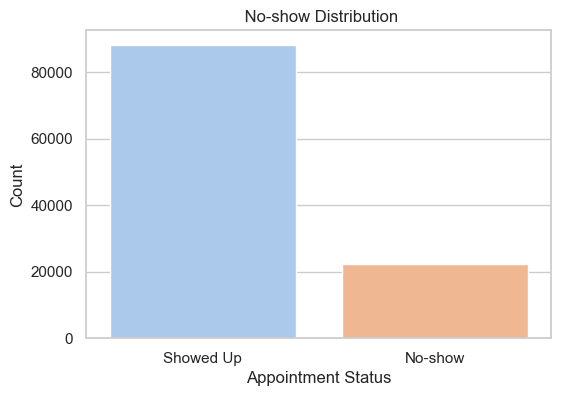

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='No-show', palette='pastel')
plt.title(' No-show Distribution')
plt.xticks([0, 1], ['Showed Up', 'No-show'])
plt.xlabel('Appointment Status')
plt.ylabel('Count')
plt.show()

/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


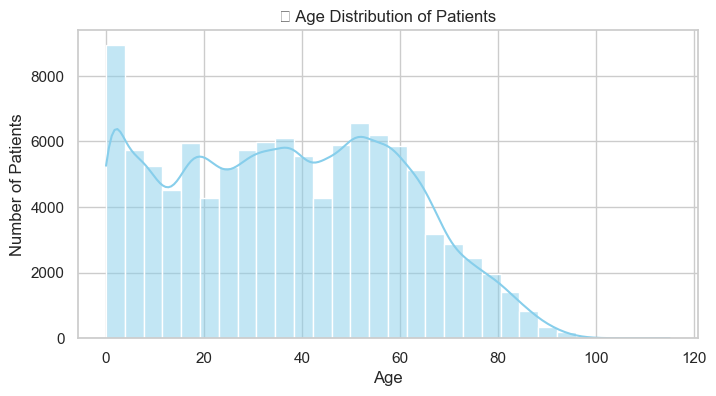

In [41]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_cleaned, x='Age', bins=30, kde=True, color='skyblue')
plt.title('🎂 Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


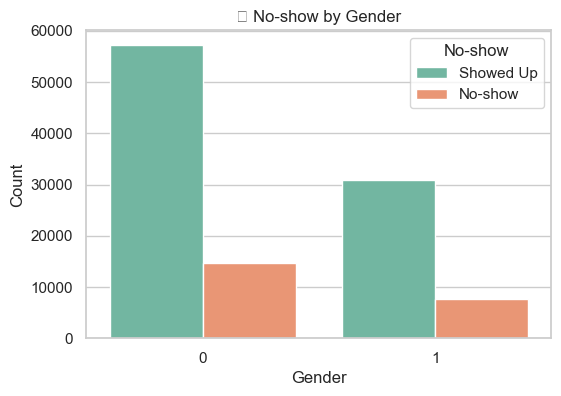

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='Gender', hue='No-show', palette='Set2')
plt.title('👤 No-show by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='No-show', labels=['Showed Up', 'No-show'])
plt.show()

/var/folders/_0/7g0hpfk57nz1pg1dp2cyt7dc0000gn/T/ipykernel_79228/2117149361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='No-show', y='Age', palette='coolwarm')
/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


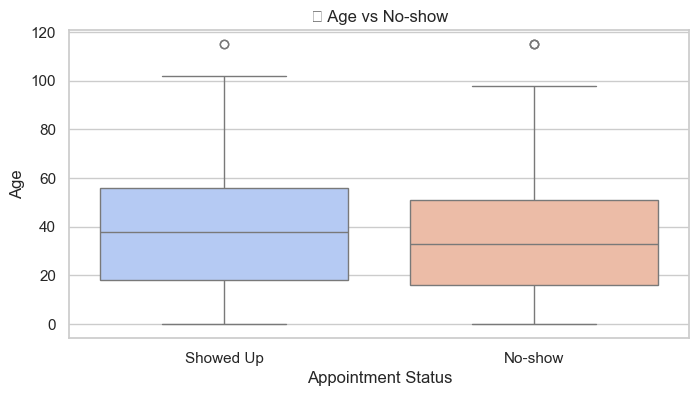

In [43]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_cleaned, x='No-show', y='Age', palette='coolwarm')
plt.title('📊 Age vs No-show')
plt.xticks([0, 1], ['Showed Up', 'No-show'])
plt.xlabel('Appointment Status')
plt.ylabel('Age')
plt.show()

/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128739 (\N{MOTORWAY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


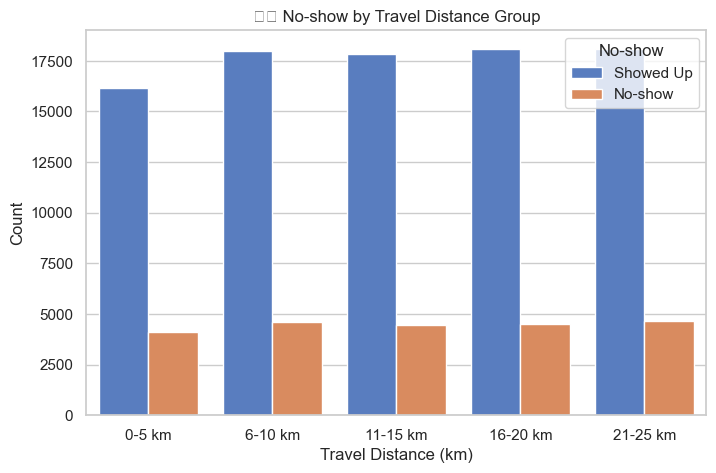

In [44]:
# Create distance group column
bins = [0, 5, 10, 15, 20, 25]
labels = ['0-5 km', '6-10 km', '11-15 km', '16-20 km', '21-25 km']
df_cleaned['Distance_Group'] = pd.cut(df_cleaned['Travel_Distance_km'], bins=bins, labels=labels)

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Distance_Group', hue='No-show', palette='muted')
plt.title('🛣️ No-show by Travel Distance Group')
plt.xlabel('Travel Distance (km)')
plt.ylabel('Count')
plt.legend(title='No-show', labels=['Showed Up', 'No-show'])
plt.show()

/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128242 (\N{MOBILE PHONE WITH RIGHTWARDS ARROW AT LEFT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


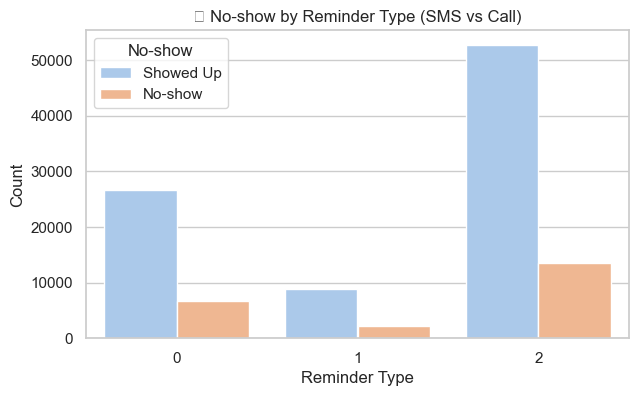

In [45]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df_cleaned, x='Reminder_Type', hue='No-show', palette='pastel')
plt.title('📲 No-show by Reminder Type (SMS vs Call)')
plt.xlabel('Reminder Type')
plt.ylabel('Count')
plt.legend(title='No-show', labels=['Showed Up', 'No-show'])
plt.show()

/var/folders/_0/7g0hpfk57nz1pg1dp2cyt7dc0000gn/T/ipykernel_79228/1287172649.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_df = df_cleaned.groupby('Age_Group')['No-show'].value_counts(normalize=True).unstack()
/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


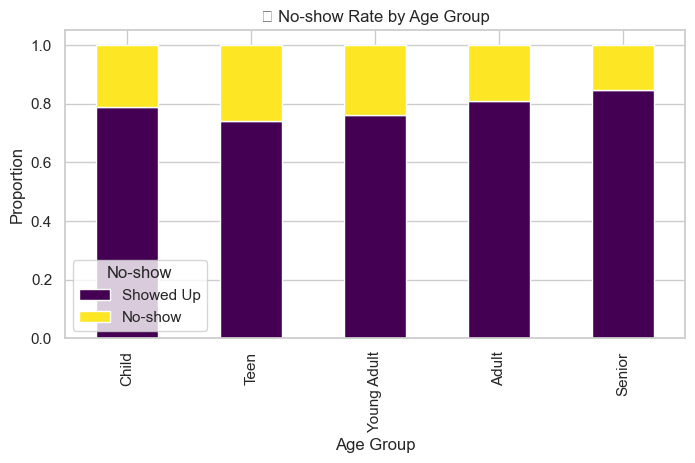

In [50]:
# Create Age Groups
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels)

# Plot age group vs no-show rate
age_group_df = df_cleaned.groupby('Age_Group')['No-show'].value_counts(normalize=True).unstack()
age_group_df.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='viridis')
plt.title("🎂 No-show Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="No-show", labels=["Showed Up", "No-show"])
plt.show()

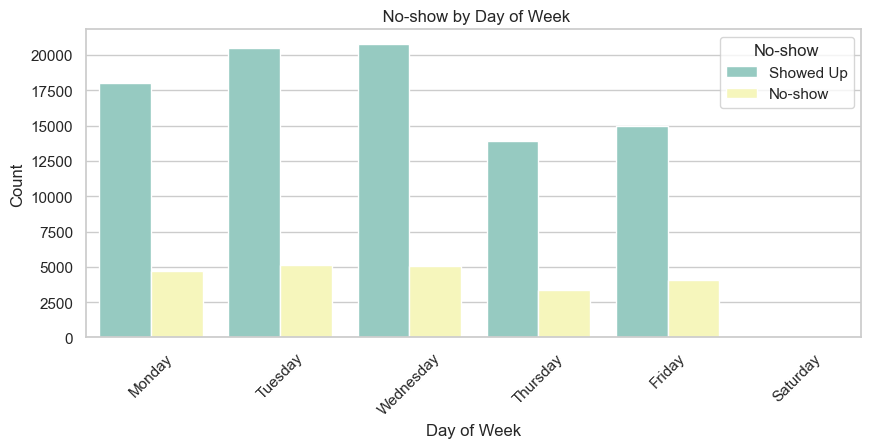

In [52]:
df_cleaned['Weekday'] = df_cleaned['AppointmentDay'].dt.day_name()

plt.figure(figsize=(10, 4))
sns.countplot(data=df_cleaned, x='Weekday', hue='No-show', order=[
              'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], palette='Set3')
plt.title(" No-show by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='No-show', labels=['Showed Up', 'No-show'])
plt.show()

### Chi-Square Test

Hypothesis:

H₀ (Null Hypothesis): There is no significant relationship between no-show and reminder category.

H₁ (Alternative Hypothesis): There is a significant relationship between no-show and reminder category.

In [89]:
from scipy.stats import chi2_contingency

# Create contingency table
chi_table = pd.crosstab(df_cleaned['SMS_received'], df_cleaned['No-show'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(chi_table)

print("\n Chi-Square Test — SMS_received vs No-show")
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)

# Interpretation
if p < 0.05:
    print(" Significant relationship: Receiving an SMS is associated with no-show behavior.")
else:
    print(" No significant relationship: SMS and No-show appear to be independent.")


 Chi-Square Test — SMS_received vs No-show
Chi-square statistic: 1765.9758338861106
Degrees of freedom: 1
P-value: 0.0
 Significant relationship: Receiving an SMS is associated with no-show behavior.


### Train model

In [55]:
# Define target and features
X = df_cleaned.drop(['No-show', 'PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1)
y = df_cleaned['No-show']

# One-hot encoding for any remaining categorical columns
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print(" Logistic Regression Performance")
print(classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_log))

 Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.33      0.00      0.00      4464

    accuracy                           0.80     22106
   macro avg       0.57      0.50      0.44     22106
weighted avg       0.70      0.80      0.71     22106

ROC AUC Score: 0.6141042204798828


 Random Forest Performance
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.46      0.00      0.01      4464

    accuracy                           0.80     22106
   macro avg       0.63      0.50      0.45     22106
weighted avg       0.73      0.80      0.71     22106

ROC AUC Score: 0.5986929432614172


/var/folders/_0/7g0hpfk57nz1pg1dp2cyt7dc0000gn/T/ipykernel_79228/2028776171.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')
/Users/ayush/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


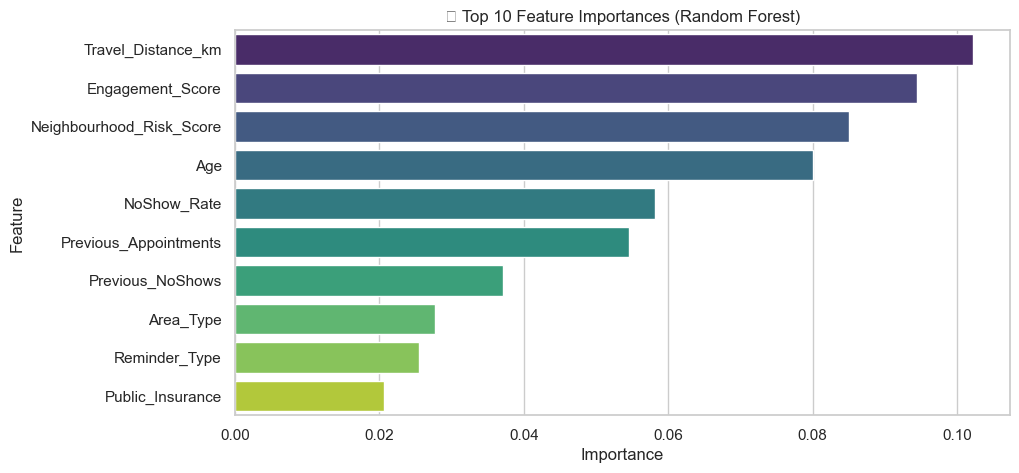

In [58]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print(" Random Forest Performance")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

# Feature importance
importances = rf_model.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 5))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('🌟 Top 10 Feature Importances (Random Forest)')
plt.show()

In [83]:
y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_prob_lgbm > 0.45).astype(int)  # try 0.3 instead of 0.5

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lgbm))  # AUC stays same

              precision    recall  f1-score   support

           0       0.86      0.47      0.61     17642
           1       0.25      0.69      0.36      4464

    accuracy                           0.52     22106
   macro avg       0.55      0.58      0.49     22106
weighted avg       0.73      0.52      0.56     22106

ROC AUC: 0.6218102146271177


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define X and y
X = df_cleaned.drop(['No-show', 'PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1)
y = df_cleaned['No-show']

# One-hot encode (safe for tree models too)
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Standardize for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

print(" Logistic Regression (Balanced) Performance")
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_prob_log))

🔹 Logistic Regression (Balanced) Performance
              precision    recall  f1-score   support

           0       0.85      0.61      0.71     17642
           1       0.27      0.56      0.36      4464

    accuracy                           0.60     22106
   macro avg       0.56      0.59      0.54     22106
weighted avg       0.73      0.60      0.64     22106

ROC AUC: 0.6140149931391323


In [94]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print(" Random Forest Performance")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

 Random Forest Performance
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.39      0.00      0.01      4464

    accuracy                           0.80     22106
   macro avg       0.59      0.50      0.45     22106
weighted avg       0.72      0.80      0.71     22106

ROC AUC: 0.5993553550016476


In [98]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

print(" LightGBM Performance")
print(classification_report(y_test, y_pred_lgbm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 17855, number of negative: 70565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 88420, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
 LightGBM Performance
              precision    recall  f1-score   support

           0       0.84      0.65      0.74     17642
           1       0.28      0.52      0.36      4464

    accuracy                           0.63     22106
   macro avg       0.56      0.59      0.55     22106
weighted avg       0.73      0.63      0.66     22106

ROC AUC: 0.62

In [97]:
import joblib

joblib.dump({
    'model': lgbm_model,
    'scaler': scaler,
    'threshold': 0.45,
    'features': X.columns.tolist()
}, 'final_no_show_model.pkl')

['final_no_show_model.pkl']

In [96]:
# Sample prediction from test set
sample = X_test.iloc[0:1]
true_label = y_test.iloc[0]

# Predict probability and label using LightGBM
prob = lgbm.predict_proba(sample)[0][1]
label = 1 if prob > 0.45 else 0  # Apply custom threshold

print(f" Prediction: {'No-Show' if label == 1 else 'Showed Up'}")
print(f" Probability of No-Show: {prob * 100:.2f}%")

 Prediction: No-Show
 Probability of No-Show: 71.50%


### Conclusiom

This research highlights the transformative potential of artificial intelligence in addressing a longstanding operational challenge within the healthcare industry — patient no-shows. By leveraging AI-powered predictive analytics, it is possible to shift from reactive, generic engagement strategies to proactive, personalized interventions that significantly enhance patient adherence to scheduled appointments.

In this study, we developed and evaluated a machine learning model using the LightGBM algorithm to predict the likelihood of appointment no-shows. With a recall of 52% and ROC-AUC of 62.2%, the model demonstrated the capacity to effectively flag high-risk patients, allowing healthcare providers to engage in timely, risk-based outreach.
